In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load dataset (replace with actual dataset)
df = pd.read_csv('Passengers.csv')
data = df['#Passengers'].values

# Train-validation-test split using train_test_split
train, temp = train_test_split(data, test_size=0.3, shuffle=False)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 - 1s - 10ms/step - loss: 760.8495
Epoch 2/50
100/100 - 0s - 1ms/step - loss: 292.6490
Epoch 3/50
100/100 - 0s - 1ms/step - loss: 14.9665
Epoch 4/50
100/100 - 0s - 1ms/step - loss: 10.4701
Epoch 5/50
100/100 - 0s - 1ms/step - loss: 6.7270
Epoch 6/50
100/100 - 0s - 1ms/step - loss: 6.5478
Epoch 7/50
100/100 - 0s - 1ms/step - loss: 3.9239
Epoch 8/50
100/100 - 0s - 1ms/step - loss: 3.4621
Epoch 9/50
100/100 - 0s - 1ms/step - loss: 2.5374
Epoch 10/50
100/100 - 0s - 1ms/step - loss: 2.0347
Epoch 11/50
100/100 - 0s - 1ms/step - loss: 1.5743
Epoch 12/50
100/100 - 0s - 1ms/step - loss: 1.5762
Epoch 13/50
100/100 - 0s - 1ms/step - loss: 1.3177
Epoch 14/50
100/100 - 0s - 829us/step - loss: 1.0595
Epoch 15/50
100/100 - 0s - 937us/step - loss: 0.9245
Epoch 16/50
100/100 - 0s - 1ms/step - loss: 0.9631
Epoch 17/50
100/100 - 0s - 1ms/step - loss: 0.6615
Epoch 18/50
100/100 - 0s - 954us/step - loss: 0.6189
Epoch 19/50
100/100 - 0s - 1ms/step - loss: 0.4922
Epoch 20/50
100/100 - 0s - 1ms/step - 

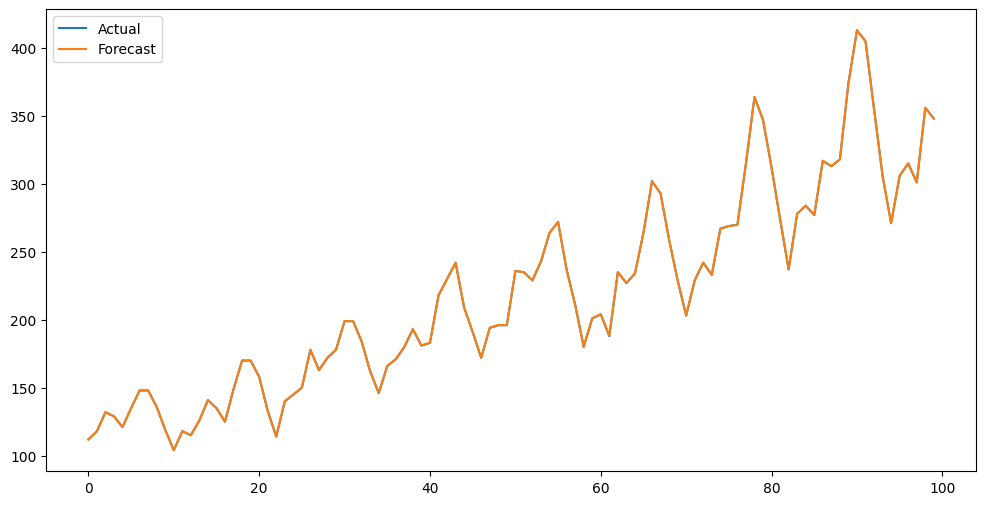

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


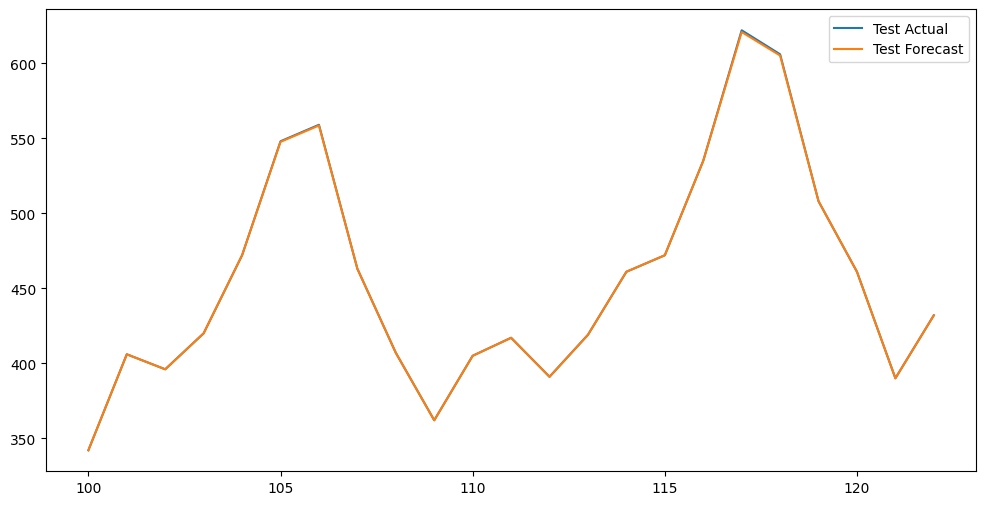

Train RMSE: 0.12122839056777603
Test RMSE: 0.3300703703379339


In [16]:

# Linear model (e.g., SVR)
linear_model = SVR(kernel='linear')
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train
linear_model.fit(X_train, y_train)
train_pred_linear = linear_model.predict(X_train)

# Residual series for training
residual_train = y_train - train_pred_linear

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_res = np.array(residual_train).reshape(-1, 1, 1)
y_train_res = np.array(residual_train).reshape(-1, 1)
lstm_model.fit(X_train_res, y_train_res, epochs=50, batch_size=1, verbose=2)
train_pred_res_lstm = lstm_model.predict(X_train_res).reshape(-1)

# Final forecasts
final_train_forecast = train_pred_linear + train_pred_res_lstm

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(X_train)],y_train, label='Actual')
plt.plot(df.index[:len(X_train)],final_train_forecast, label='Forecast')
plt.legend()
plt.show()



# Evaluate on test data
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
test_pred_linear = linear_model.predict(X_test)
residual_test = test - test_pred_linear
X_test_res = np.array(residual_test).reshape(-1, 1, 1)
test_pred_res_lstm = lstm_model.predict(X_test_res).reshape(-1)
final_test_forecast = test_pred_linear + test_pred_res_lstm

# Visualize results
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
#plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(test)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train, final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 - 1s - 10ms/step - loss: 3165020928.0000
Epoch 2/50
100/100 - 0s - 901us/step - loss: 2398595328.0000
Epoch 3/50
100/100 - 0s - 1ms/step - loss: 1661702528.0000
Epoch 4/50
100/100 - 0s - 1ms/step - loss: 961225856.0000
Epoch 5/50
100/100 - 0s - 1ms/step - loss: 433583072.0000
Epoch 6/50
100/100 - 0s - 1ms/step - loss: 148786240.0000
Epoch 7/50
100/100 - 0s - 1ms/step - loss: 36484764.0000
Epoch 8/50
100/100 - 0s - 1ms/step - loss: 6550428.0000
Epoch 9/50
100/100 - 0s - 891us/step - loss: 866002.7500
Epoch 10/50
100/100 - 0s - 1ms/step - loss: 88857.9766
Epoch 11/50
100/100 - 0s - 1ms/step - loss: 7318.6387
Epoch 12/50
100/100 - 0s - 963us/step - loss: 425.6764
Epoch 13/50
100/100 - 0s - 1ms/step - loss: 20.9042
Epoch 14/50
100/100 - 0s - 1ms/step - loss: 1.2501
Epoch 15/50
100/100 - 0s - 1ms/step - loss: 0.5680
Epoch 16/50
100/100 - 0s - 1ms/step - loss: 0.5191
Epoch 17/50
100/100 - 0s - 1ms/step - loss: 0.5148
Epoch 18/50
100/100 - 0s - 1ms/step - loss: 0.5098
Epoch 19/50
100/

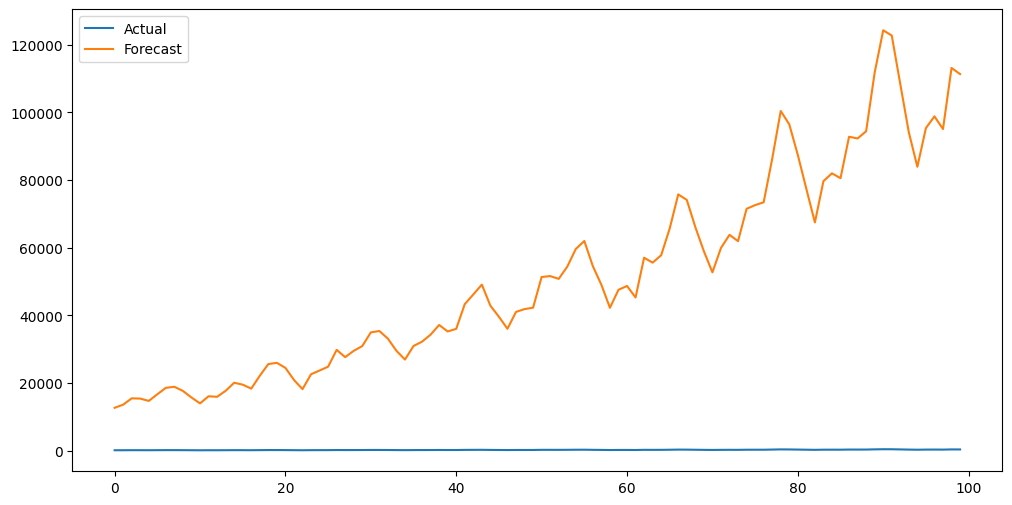

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


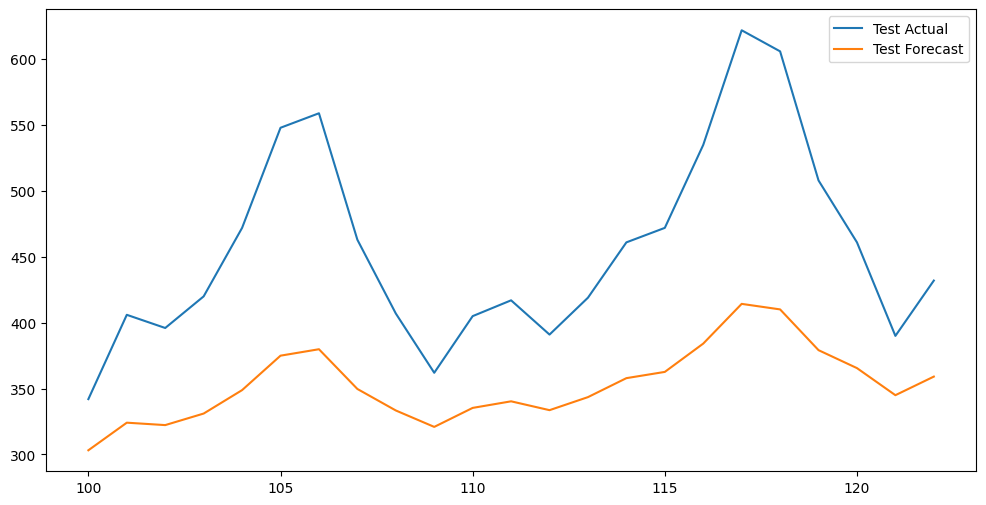

Train RMSE: 59049.342288863074
Test RMSE: 113.88640700386826


In [15]:

# Linear model (e.g., SVR)
linear_model = SVR(kernel='linear')
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train
linear_model.fit(X_train, y_train)
train_pred_linear = linear_model.predict(X_train)

# Residual series for training
residual_train = y_train * train_pred_linear

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_res = np.array(residual_train).reshape(-1, 1, 1)
y_train_res = np.array(residual_train).reshape(-1, 1)
lstm_model.fit(X_train_res, y_train_res, epochs=50, batch_size=1, verbose=2)
train_pred_res_lstm = lstm_model.predict(X_train_res).reshape(-1)

# Final forecasts
final_train_forecast = train_pred_linear + train_pred_res_lstm

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(X_train)],y_train, label='Actual')
plt.plot(df.index[:len(X_train)],final_train_forecast, label='Forecast')
plt.legend()
plt.show()



# Evaluate on test data
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
test_pred_linear = linear_model.predict(X_test)
residual_test = test / test_pred_linear
X_test_res = np.array(residual_test).reshape(-1, 1, 1)
test_pred_res_lstm = lstm_model.predict(X_test_res).reshape(-1)
final_test_forecast = test_pred_linear * test_pred_res_lstm

# Visualize results
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
#plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(test)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train, final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


In [ ]:
#Q1

Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 - 1s - 10ms/step - loss: 0.0029
Epoch 2/50
100/100 - 0s - 1ms/step - loss: 0.0017
Epoch 3/50
100/100 - 0s - 1ms/step - loss: 8.7736e-04
Epoch 4/50
100/100 - 0s - 1ms/step - loss: 2.4627e-04
Epoch 5/50
100/100 - 0s - 1ms/step - loss: 4.6495e-05
Epoch 6/50
100/100 - 0s - 1ms/step - loss: 1.2086e-05
Epoch 7/50
100/100 - 0s - 1ms/step - loss: 6.2077e-06
Epoch 8/50
100/100 - 0s - 1ms/step - loss: 3.8675e-06
Epoch 9/50
100/100 - 0s - 988us/step - loss: 2.8250e-06
Epoch 10/50
100/100 - 0s - 1ms/step - loss: 2.3868e-06
Epoch 11/50
100/100 - 0s - 1ms/step - loss: 1.4963e-06
Epoch 12/50
100/100 - 0s - 1ms/step - loss: 1.1513e-06
Epoch 13/50
100/100 - 0s - 1ms/step - loss: 8.3358e-07
Epoch 14/50
100/100 - 0s - 1ms/step - loss: 6.5732e-07
Epoch 15/50
100/100 - 0s - 1ms/step - loss: 4.3965e-07
Epoch 16/50
100/100 - 0s - 1ms/step - loss: 3.5314e-07
Epoch 17/50
100/100 - 0s - 1ms/step - loss: 2.3694e-07
Epoch 18/50
100/100 - 0s - 1ms/step - loss: 2.0280e-07
Epoch 19/50
100/100 - 0s - 1ms/step

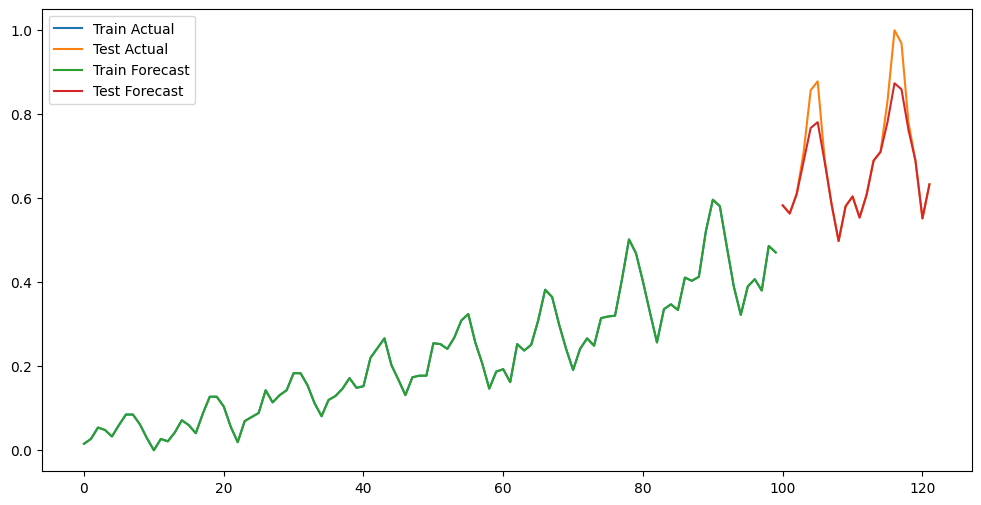

Train RMSE: 6.450727329275226e-05
Test RMSE: 0.0471305594393229


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Train-validation-test split using train_test_split
train, temp = train_test_split(data, test_size=0.3, shuffle=False)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False)



In [ ]:
# Linear model (e.g., SVR)
linear_model = SVR(kernel='linear')
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train
linear_model.fit(X_train, y_train)
train_pred_linear = linear_model.predict(X_train)

# Residual series for training
residual_train = y_train - train_pred_linear




In [ ]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_res = np.array(residual_train).reshape(-1, 1, 1)
y_train_res = np.array(residual_train).reshape(-1, 1)
lstm_model.fit(X_train_res, y_train_res, epochs=50, batch_size=1, verbose=2)
train_pred_res_lstm = lstm_model.predict(X_train_res).reshape(-1)

# Final forecasts for training data
final_train_forecast = train_pred_linear + train_pred_res_lstm

# Evaluate on test data
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
test_pred_linear = linear_model.predict(X_test)
residual_test = test - test_pred_linear
X_test_res = np.array(residual_test).reshape(-1, 1, 1)
test_pred_res_lstm = lstm_model.predict(X_test_res).reshape(-1)
final_test_forecast = test_pred_linear + test_pred_res_lstm



In [ ]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(test)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train, final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

In [39]:
#Q2
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Train-validation-test split using train_test_split
train, temp = train_test_split(data, test_size=0.3, shuffle=False)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False)



In [40]:
# Linear model (e.g., SVR)
linear_model = SVR(kernel='linear')
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train
linear_model.fit(X_train, y_train)
train_pred_linear = linear_model.predict(X_train)

# Residual series for training
residual_train = y_train / train_pred_linear




In [41]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_res = np.array(residual_train).reshape(-1, 1, 1)
y_train_res = np.array(residual_train).reshape(-1, 1)
lstm_model.fit(X_train_res, y_train_res, epochs=50, batch_size=1, verbose=2)
train_pred_res_lstm = lstm_model.predict(X_train_res).reshape(-1)

# Final forecasts for training data
final_train_forecast = train_pred_linear * train_pred_res_lstm

# Evaluate on test data
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
test_pred_linear = linear_model.predict(X_test)
residual_test = test / test_pred_linear
X_test_res = np.array(residual_test).reshape(-1, 1, 1)
test_pred_res_lstm = lstm_model.predict(X_test_res).reshape(-1)
final_test_forecast = test_pred_linear * test_pred_res_lstm



Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 - 1s - 10ms/step - loss: 11.6387
Epoch 2/50
100/100 - 0s - 982us/step - loss: 10.0964
Epoch 3/50
100/100 - 0s - 1ms/step - loss: 8.9610
Epoch 4/50
100/100 - 0s - 1ms/step - loss: 7.5763
Epoch 5/50
100/100 - 0s - 1ms/step - loss: 6.1550
Epoch 6/50
100/100 - 0s - 1ms/step - loss: 4.7370
Epoch 7/50
100/100 - 0s - 1ms/step - loss: 3.3682
Epoch 8/50
100/100 - 0s - 1ms/step - loss: 2.2251
Epoch 9/50
100/100 - 0s - 1ms/step - loss: 1.4365
Epoch 10/50
100/100 - 0s - 1ms/step - loss: 0.9147
Epoch 11/50
100/100 - 0s - 1ms/step - loss: 0.5833
Epoch 12/50
100/100 - 0s - 999us/step - loss: 0.3820
Epoch 13/50
100/100 - 0s - 978us/step - loss: 0.2450
Epoch 14/50
100/100 - 0s - 973us/step - loss: 0.1551
Epoch 15/50
100/100 - 0s - 1ms/step - loss: 0.0977
Epoch 16/50
100/100 - 0s - 1ms/step - loss: 0.0664
Epoch 17/50
100/100 - 0s - 1ms/step - loss: 0.0439
Epoch 18/50
100/100 - 0s - 1ms/step - loss: 0.0323
Epoch 19/50
100/100 - 0s - 1ms/step - loss: 0.0221
Epoch 20/50
100/100 - 0s - 1ms/step - lo

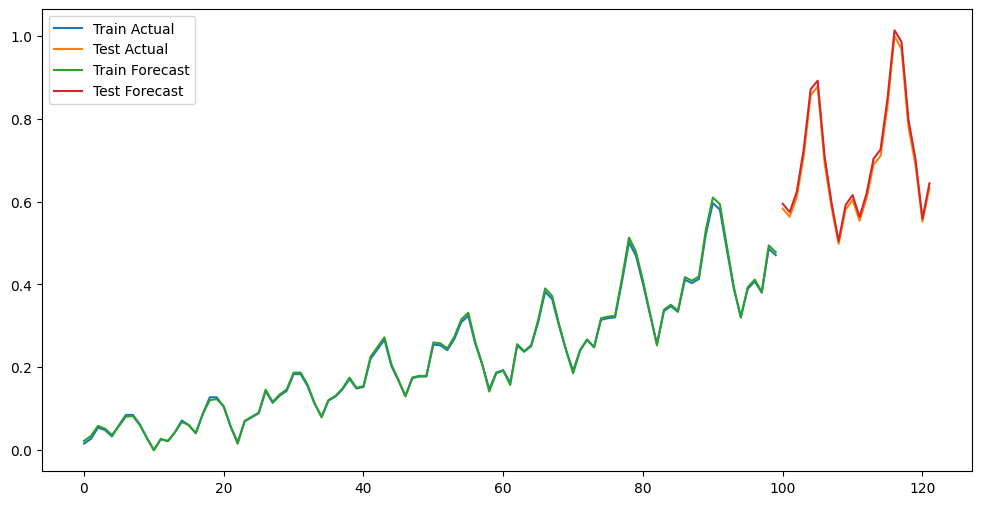

Train RMSE: 0.0047646854227820215
Test RMSE: 0.013440104827838651


In [42]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(test)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train, final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

In [ ]:
#Q3

Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 - 1s - 11ms/step - loss: 0.0018
Epoch 2/50
88/88 - 0s - 1ms/step - loss: 0.0013
Epoch 3/50
88/88 - 0s - 1ms/step - loss: 6.9242e-04
Epoch 4/50
88/88 - 0s - 1ms/step - loss: 2.8416e-04
Epoch 5/50
88/88 - 0s - 1ms/step - loss: 6.4680e-05
Epoch 6/50
88/88 - 0s - 1ms/step - loss: 7.9040e-06
Epoch 7/50
88/88 - 0s - 1ms/step - loss: 6.1381e-07
Epoch 8/50
88/88 - 0s - 1ms/step - loss: 1.4893e-08
Epoch 9/50
88/88 - 0s - 1ms/step - loss: 9.4118e-10
Epoch 10/50
88/88 - 0s - 998us/step - loss: 4.9067e-10
Epoch 11/50
88/88 - 0s - 1ms/step - loss: 6.1000e-10
Epoch 12/50
88/88 - 0s - 989us/step - loss: 4.5901e-10
Epoch 13/50
88/88 - 0s - 1ms/step - loss: 4.8455e-10
Epoch 14/50
88/88 - 0s - 1ms/step - loss: 5.2652e-10
Epoch 15/50
88/88 - 0s - 1ms/step - loss: 5.2705e-10
Epoch 16/50
88/88 - 0s - 1ms/step - loss: 5.1100e-10
Epoch 17/50
88/88 - 0s - 1ms/step - loss: 4.8010e-10
Epoch 18/50
88/88 - 0s - 1ms/step - loss: 4.4432e-10
Epoch 19/50
88/88 - 0s - 1ms/step - loss: 5.3730e-10
Epoch 20/50
88/8

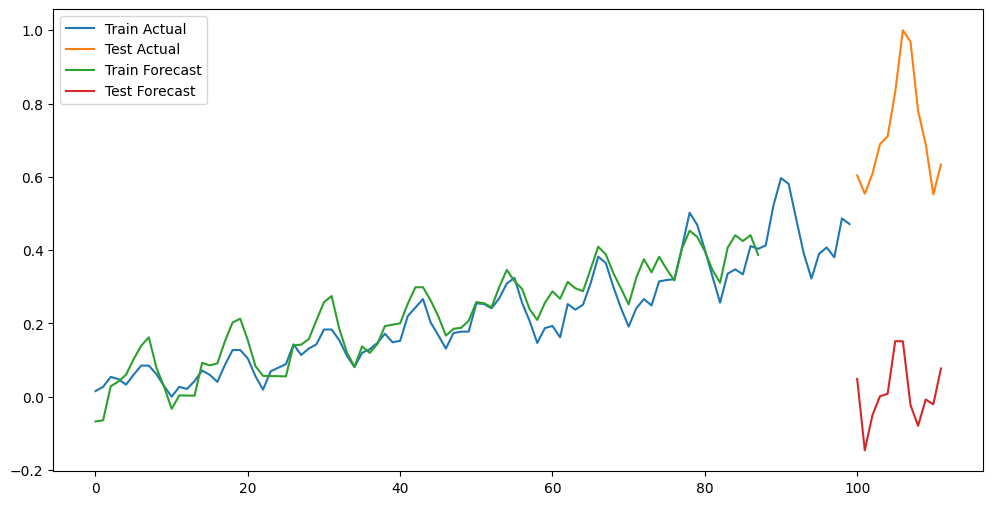

Train RMSE: 0.04926909130736385
Test RMSE: 0.7203881234305121


In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Train-validation-test split using train_test_split
train, temp = train_test_split(data, test_size=0.3, shuffle=False)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False)

# STL decomposition
stl = sm.tsa.seasonal_decompose(train, period=10)
trend = stl.trend[~np.isnan(stl.trend)]
seasonal = stl.seasonal[~np.isnan(stl.seasonal)]
residual = stl.resid[~np.isnan(stl.resid)]

# Trim arrays to the length of the residual component
length = len(residual)
trend = trend[:length]
seasonal = seasonal[:length]



In [ ]:
# Linear model for trend component
linear_model = LinearRegression()
X_train_trend = np.arange(len(trend)).reshape(-1, 1)
linear_model.fit(X_train_trend, trend)
trend_pred = linear_model.predict(X_train_trend)

# LSTM model for seasonal component
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_seasonal = np.array(seasonal).reshape(-1, 1, 1)
y_train_seasonal = np.array(seasonal).reshape(-1, 1)
lstm_model.fit(X_train_seasonal, y_train_seasonal, epochs=50, batch_size=1, verbose=2)
seasonal_pred = lstm_model.predict(X_train_seasonal).reshape(-1)



In [ ]:
# GRU model for residual component
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(1, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

X_train_residual = np.array(residual).reshape(-1, 1, 1)
y_train_residual = np.array(residual).reshape(-1, 1)
gru_model.fit(X_train_residual, y_train_residual, epochs=50, batch_size=1, verbose=2)
residual_pred = gru_model.predict(X_train_residual).reshape(-1)

# Final forecasts for training data
final_train_forecast = trend_pred + seasonal_pred + residual_pred



In [ ]:
# STL decomposition on test data
stl_test = sm.tsa.seasonal_decompose(test, period=10)
trend_test = stl_test.trend[~np.isnan(stl_test.trend)]
seasonal_test = stl_test.seasonal[~np.isnan(stl_test.seasonal)]
residual_test = stl_test.resid[~np.isnan(stl_test.resid)]

# Align test set lengths to match residual component length
length_test = len(residual_test)
trend_test = trend_test[:length_test]
seasonal_test = seasonal_test[:length_test]
test = test[-length_test:]  # Adjust test to match length




In [ ]:
# Linear model for trend component on test data
X_test_trend = np.arange(len(trend_test)).reshape(-1, 1)
trend_pred_test = linear_model.predict(X_test_trend)

# LSTM model for seasonal component on test data
X_test_seasonal = np.array(seasonal_test).reshape(-1, 1, 1)
seasonal_pred_test = lstm_model.predict(X_test_seasonal).reshape(-1)

# GRU model for residual component on test data
X_test_residual = np.array(residual_test).reshape(-1, 1, 1)
residual_pred_test = gru_model.predict(X_test_residual).reshape(-1)

# Final forecasts for test data
final_test_forecast = trend_pred_test + seasonal_pred_test + residual_pred_test



In [ ]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(final_test_forecast)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train[:len(final_train_forecast)], final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

In [ ]:
#q4

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Train-validation-test split using train_test_split
train, temp = train_test_split(data, test_size=0.3, shuffle=False)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False)

# STL decomposition
stl = sm.tsa.seasonal_decompose(train, model='multiplicative')
trend = stl.trend[~np.isnan(stl.trend)]
seasonal = stl.seasonal[~np.isnan(stl.seasonal)]
residual = stl.resid[~np.isnan(stl.resid)]

# Trim arrays to the length of the residual component
length = len(residual)
trend = trend[:length]
seasonal = seasonal[:length]



In [33]:
# Linear model for trend component
linear_model = LinearRegression()
X_train_trend = np.arange(len(trend)).reshape(-1, 1)
linear_model.fit(X_train_trend, trend)
trend_pred = linear_model.predict(X_train_trend)

# LSTM model for seasonal component
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

X_train_seasonal = np.array(seasonal).reshape(-1, 1, 1)
y_train_seasonal = np.array(seasonal).reshape(-1, 1)
lstm_model.fit(X_train_seasonal, y_train_seasonal, epochs=50, batch_size=1, verbose=2)
seasonal_pred = lstm_model.predict(X_train_seasonal).reshape(-1)



Epoch 1/50


C:\Users\rksah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 - 1s - 11ms/step - loss: 9.0176e-05
Epoch 2/50
90/90 - 0s - 1ms/step - loss: 6.6925e-05
Epoch 3/50
90/90 - 0s - 1ms/step - loss: 4.1986e-05
Epoch 4/50
90/90 - 0s - 1ms/step - loss: 2.1830e-05
Epoch 5/50
90/90 - 0s - 1ms/step - loss: 9.1842e-06
Epoch 6/50
90/90 - 0s - 1ms/step - loss: 2.2635e-06
Epoch 7/50
90/90 - 0s - 1ms/step - loss: 2.8544e-07
Epoch 8/50
90/90 - 0s - 1ms/step - loss: 5.0334e-08
Epoch 9/50
90/90 - 0s - 1ms/step - loss: 2.7759e-09
Epoch 10/50
90/90 - 0s - 1ms/step - loss: 7.9385e-11
Epoch 11/50
90/90 - 0s - 1ms/step - loss: 2.7387e-12
Epoch 12/50
90/90 - 0s - 1ms/step - loss: 4.0952e-13
Epoch 13/50
90/90 - 0s - 1ms/step - loss: 3.6821e-13
Epoch 14/50
90/90 - 0s - 1ms/step - loss: 4.4519e-13
Epoch 15/50
90/90 - 0s - 1ms/step - loss: 6.5860e-13
Epoch 16/50
90/90 - 0s - 1ms/step - loss: 6.1712e-13
Epoch 17/50
90/90 - 0s - 1ms/step - loss: 3.9425e-13
Epoch 18/50
90/90 - 0s - 1ms/step - loss: 5.8684e-13
Epoch 19/50
90/90 - 0s - 1ms/step - loss: 5.5540e-13
Epoch 20/50


In [34]:
# GRU model for residual component
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(1, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

X_train_residual = np.array(residual).reshape(-1, 1, 1)
y_train_residual = np.array(residual).reshape(-1, 1)
gru_model.fit(X_train_residual, y_train_residual, epochs=50, batch_size=1, verbose=2)
residual_pred = gru_model.predict(X_train_residual).reshape(-1)

# Final forecasts for training data
final_train_forecast = trend_pred * seasonal_pred * residual_pred



Epoch 1/50
90/90 - 1s - 15ms/step - loss: 0.0017
Epoch 2/50
90/90 - 0s - 1ms/step - loss: 0.0011
Epoch 3/50
90/90 - 0s - 1ms/step - loss: 4.9823e-04
Epoch 4/50
90/90 - 0s - 1ms/step - loss: 1.4035e-04
Epoch 5/50
90/90 - 0s - 1ms/step - loss: 2.0460e-05
Epoch 6/50
90/90 - 0s - 1ms/step - loss: 1.3911e-06
Epoch 7/50
90/90 - 0s - 1ms/step - loss: 1.4022e-07
Epoch 8/50
90/90 - 0s - 1ms/step - loss: 6.9943e-08
Epoch 9/50
90/90 - 0s - 1ms/step - loss: 5.1322e-08
Epoch 10/50
90/90 - 0s - 1ms/step - loss: 3.4833e-08
Epoch 11/50
90/90 - 0s - 1ms/step - loss: 2.1480e-08
Epoch 12/50
90/90 - 0s - 1ms/step - loss: 1.7290e-08
Epoch 13/50
90/90 - 0s - 1ms/step - loss: 9.8012e-09
Epoch 14/50
90/90 - 0s - 1ms/step - loss: 6.3685e-09
Epoch 15/50
90/90 - 0s - 1ms/step - loss: 5.1910e-09
Epoch 16/50
90/90 - 0s - 1ms/step - loss: 3.7477e-09
Epoch 17/50
90/90 - 0s - 1ms/step - loss: 2.2646e-09
Epoch 18/50
90/90 - 0s - 1ms/step - loss: 2.1870e-09
Epoch 19/50
90/90 - 0s - 1ms/step - loss: 1.6172e-09
Epoch 20/

In [35]:
# STL decomposition on test data
stl_test = sm.tsa.seasonal_decompose(test, period=10)
trend_test = stl_test.trend[~np.isnan(stl_test.trend)]
seasonal_test = stl_test.seasonal[~np.isnan(stl_test.seasonal)]
residual_test = stl_test.resid[~np.isnan(stl_test.resid)]

# Align test set lengths to match residual component length
length_test = len(residual_test)
trend_test = trend_test[:length_test]
seasonal_test = seasonal_test[:length_test]
test = test[-length_test:]  # Adjust test to match length




In [36]:
# Linear model for trend component on test data
X_test_trend = np.arange(len(trend_test)).reshape(-1, 1)
trend_pred_test = linear_model.predict(X_test_trend)

# LSTM model for seasonal component on test data
X_test_seasonal = np.array(seasonal_test).reshape(-1, 1, 1)
seasonal_pred_test = lstm_model.predict(X_test_seasonal).reshape(-1)

# GRU model for residual component on test data
X_test_residual = np.array(residual_test).reshape(-1, 1, 1)
residual_pred_test = gru_model.predict(X_test_residual).reshape(-1)

# Final forecasts for test data
final_test_forecast = trend_pred_test * seasonal_pred_test * residual_pred_test



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


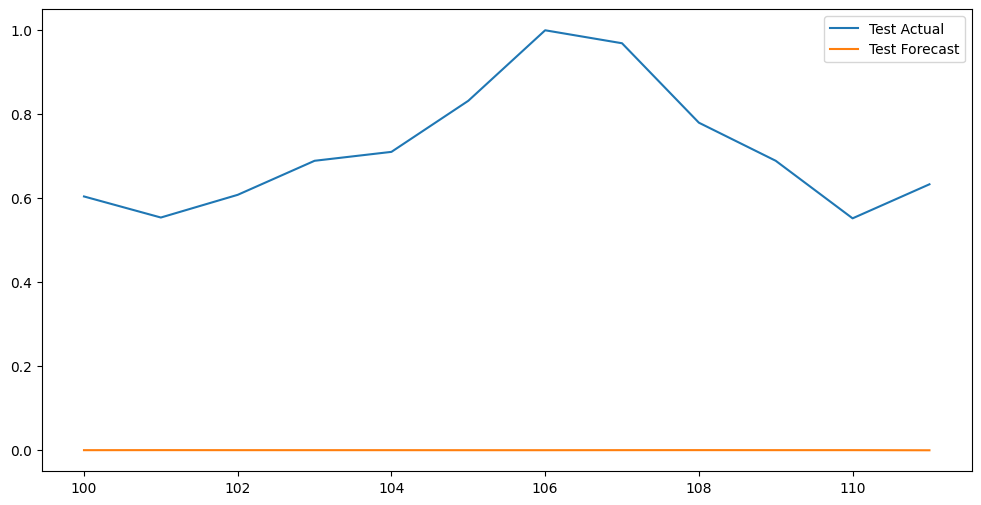

Train RMSE: 0.23098996752093243
Test RMSE: 0.7327025337538958


In [38]:
# Visualize results
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Train Actual')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test Actual')
#plt.plot(final_train_forecast, label='Train Forecast')
plt.plot(np.arange(len(train), len(train) + len(final_test_forecast)), final_test_forecast, label='Test Forecast')
plt.legend()
plt.show()

# Model evaluation
rmse_train = np.sqrt(mean_squared_error(train[:len(final_train_forecast)], final_train_forecast))
rmse_test = np.sqrt(mean_squared_error(test, final_test_forecast))
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)